# Imports

In [1]:
import matplotlib.pyplot as plt

# Reading from file

In [2]:
def ReadSignalFile(file_name):
    expected_indices=[]
    expected_samples=[]
    with open(file_name, 'r') as f:
        line = f.readline()
        line = f.readline()
        line = f.readline()
        line = f.readline()
        while line:
            # process line
            L=line.strip()
            if len(L.split(' '))==2:
                L=line.split(' ')
                V1=int(L[0])
                V2=float(L[1])
                expected_indices.append(V1)
                expected_samples.append(V2)
                line = f.readline()
            else:
                break
    return expected_indices,expected_samples

In [4]:
indices, samples = ReadSignalFile('Signal1.txt')

for i, s in zip(indices, samples):
    print(f"index: {i}, sample: {s}")


index: -4, sample: -2.0
index: -3, sample: 2.0
index: -2, sample: 0.0
index: -1, sample: 2.0
index: 0, sample: 4.0
index: 1, sample: 6.0
index: 2, sample: 3.0
index: 3, sample: 1.0
index: 4, sample: -1.0
index: 5, sample: -3.0
index: 6, sample: 0.0
index: 7, sample: 2.0


# Display Signal

In [48]:
def display_signal(indices : list[float], samples : list[float]):
    plt.plot(indices, samples) # x -> indices , y -> values
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Signal')
    plt.grid(True) # rectangles
    plt.tight_layout()  # adjusts padding
    # plt.show()

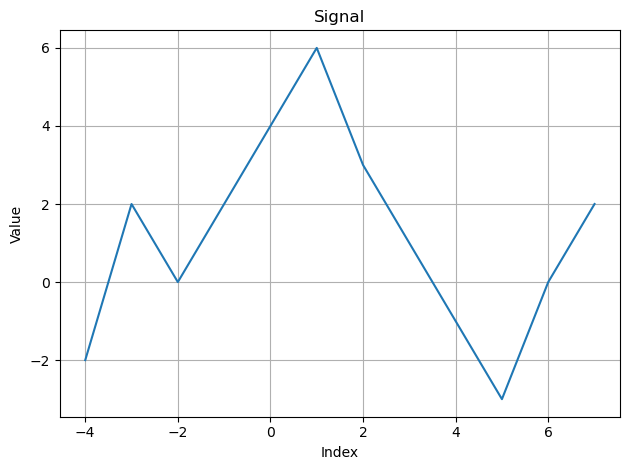

In [7]:
display_signal(indices, samples)

#Add to Signal

In [10]:
def add_signal(indices_one : list[float], samples_one : list[float], indices_two : list[float], samples_two : list[float]):
    i = j = 0
    result_indices = []
    result_samples = []

    # loop on two indices together
    while i < len(indices_one) and j < len(indices_two):
        if indices_one[i] == indices_two[j]:
            result_indices.append(indices_one[i])
            result_samples.append(samples_one[i] + samples_two[j])
            i += 1
            j += 1
        elif indices_one[i] < indices_two[j]:
            result_indices.append(indices_one[i])
            result_samples.append(samples_one[i])
            i += 1
        elif indices_one[i] > indices_two[j]:
            result_indices.append(indices_two[j])
            result_samples.append(samples_two[j])
            j += 1

    # loop on remaining indices
    while i < len(indices_one):
        result_indices.append(indices_one[i])
        result_samples.append(samples_one[i])
        i += 1

    while j < len(indices_two):
        result_indices.append(indices_two[j])
        result_samples.append(samples_two[j])
        j += 1


    return result_indices, result_samples

# Save Signal to File

In [16]:
def save_signal_to_file(file_name, indices, samples):
    with open(file_name, 'w') as f:
        f.write("0\n")
        f.write("0\n")
        f.write(str(len(indices)))
        f.write("\n")

        for i, j in zip(indices, samples):
            f.write(f"{i} {j}\n")

In [19]:
i1, s1 = ReadSignalFile("Signal1.txt")
i2, s2 = ReadSignalFile("Signal2.txt")
i3, s3 = add_signal(i1, s1, i2, s2)

print(i3)
print(s3)


[-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
[-2.0, 3.0, 0.0, 1.0, 7.0, 8.0, 4.0, -2.0, 5.0, 5.0, 3.0, 2.0]


#Multiply Signal

In [20]:
def multiply_signal(samples : list[float], factor : float):
    result_samples = []

    for index, sample in zip(indices, samples):
        result_samples.append(sample * factor)
    return result_samples

In [23]:
i1, s1 = ReadSignalFile("Signal1.txt")
s2 = multiply_signal(s1, 5)
print(i1)
print(s2)


[-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
[-10.0, 10.0, 0.0, 10.0, 20.0, 30.0, 15.0, 5.0, -5.0, -15.0, 0.0, 10.0]


#Subtract Signal

In [26]:
# multiply signal by -1, then perform addition
def subtract_signal(indices_one : list[float], samples_one : list[float], indices_two : list[float], samples_two : list[float]):
    negative_samples_two = multiply_signal(samples_two, -1)
    result_indices, result_samples = add_signal(indices_one, samples_one, indices_two, negative_samples_two)
    return result_indices, result_samples

In [27]:
i1, s1 = ReadSignalFile("Signal1.txt")
i2, s2 = ReadSignalFile("Signal2.txt")
i3, s3 = subtract_signal(i1, s1, i2, s2)

print(i3)
print(s3)


[-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
[-2.0, 1.0, 0.0, 3.0, 1.0, 4.0, 2.0, 4.0, -7.0, -11.0, -3.0, 2.0]


# Shifting Signal

In [28]:
def shift_signal(indices : list[float], shift : int):
    result_indices = []

    if shift < 0: # shift right -- delay
        for index in indices:
            result_indices.append(index + 3)
    elif shift > 0: # shift left -- advance
        for index in indices:
            result_indices.append(index - 3)
    else: # shift = 0
        result_indices = indices
    return result_indices

In [38]:
i1, s1 = ReadSignalFile("Signal1.txt")
i2 = shift_signal(i1, 3)
i3 = shift_signal(i1, -3)

print(i2) # 3
print(i3) # -3
print(s1) # samples

[-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[-2.0, 2.0, 0.0, 2.0, 4.0, 6.0, 3.0, 1.0, -1.0, -3.0, 0.0, 2.0]


# Reverse/Fold Signal

In [41]:
def reverse_signal(indices : list[float], samples : list[float]):
    reversed_samples = samples[::-1]
    result_indices = []

    for index in indices:
        result_indices.append(-1 * index)
    result_indices.sort()

    return result_indices, reversed_samples
    

In [42]:
i1, s1 = ReadSignalFile("Signal1.txt")
i2, s2 = reverse_signal(i1, s1)

print(i2)
print(s2)

[-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
[2.0, 0.0, -3.0, -1.0, 1.0, 3.0, 6.0, 4.0, 2.0, 0.0, 2.0, -2.0]


# GUI

# Imports

In [49]:
import tkinter as tk
from tkinter import filedialog, messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

#Implementation

In [72]:
class DSPApp:
    def __init__(self, root):
        self.root = root
        self.root.title("DSP App")

        # Read First Signal Button
        self.read_signal_one_button = tk.Button(root, text="Read Signal 1", command=self.read_signal_one) # button
        self.read_signal_one_button.pack(pady=10)

        # Read Second Signal Button
        self.read_signal_two_button = tk.Button(root, text="Read Signal 2", command=self.read_signal_two) # button
        self.read_signal_two_button.pack(pady=10)


        # Add Signal
        self.add_signal_button = tk.Button(root, text="Add Signal", command=self.add_signal) # button
        self.add_signal_button.pack(pady=10)

        # Subtract Signal
        self.subtract_signal_button = tk.Button(root, text="Subtract Signal", command=self.subtract_signal) # button
        self.subtract_signal_button.pack(pady=10)

        # Multiply Signal
        self.multiply_signal_label = tk.Label(root, text="Multiply Signal") # label
        self.multiply_signal_label.pack(pady=10)
        self.multiply_signal_entry = tk.Entry(root) # entry
        self.multiply_signal_entry.pack()
        self.multiply_signal_button = tk.Button(root, text="Multiply", command=self.multiply_signal) # button
        self.multiply_signal_button.pack(pady=10)

        # Shift Signal
        self.shift_signal_label = tk.Label(root, text="Shift Signal") # label
        self.shift_signal_label.pack(pady=10)
        self.shift_signal_entry = tk.Entry(root) # entry
        self.shift_signal_entry.pack()
        self.shift_signal_button = tk.Button(root, text="Shift", command=self.shift_signal) # button
        self.shift_signal_button.pack(pady=10)

        # Reverse Signal
        self.reverse_signal_button = tk.Button(root, text="Reverse Signal", command=self.reverse_signal) # button
        self.reverse_signal_button.pack(pady=10)

        # Text widget for displaying the signal 1 text
        self.signal_one_display_label = tk.Label(root, text="Result Signal 1");   # label
        self.signal_one_display_label.pack(pady=10)
        self.signal_one_display_text = tk.Text(root, height=1, width=50)    # text
        self.signal_one_display_text.pack(pady=10)

        # Text widget for displaying the signal 2 text
        self.signal_two_display_label = tk.Label(root, text="Result Signal 2");   # label
        self.signal_two_display_label.pack(pady=10)
        self.signal_two_display_text = tk.Text(root, height=1, width=50)    # text
        self.signal_two_display_text.pack(pady=10)

        # Text widget for displaying the signal result text
        self.signal_result_display_label = tk.Label(root, text="Result Signal 3");   # label
        self.signal_result_display_label.pack(pady=10)
        self.signal_result_display_text = tk.Text(root, height=1, width=50)    # text
        self.signal_result_display_text.pack(pady=10)

        # Display Signal 1 plot
        self.display_one_signal_button = tk.Button(root, text="Display Signal 1", command=self.display_signal_one) # button
        self.display_one_signal_button.pack(pady=10)

        # Display Signal 2 plot
        self.display_signal_two_button = tk.Button(root, text="Display Signal 2", command=self.display_signal_two) # button
        self.display_signal_two_button.pack(pady=10)

        # Display Signal result plot
        self.display_signal_result_button = tk.Button(root, text="Display Signal result", command=self.display_signal_two) # button
        self.display_signal_result_button.pack(pady=10)

        # Canvas for Matplotlib Figure to show signla plot
        self.canvas = None

        # Current used signals
        self.current_indices_one = [] 
        self.current_samples_one = []

        self.current_indices_two = []
        self.current_samples_two = [] 

        self.current_indices_result = []
        self.current_samples_result = []


    def read_signal_one(self):
        file_path = filedialog.askopenfilename(filetypes=[("Text Files", "*.txt")])
        if file_path:
            self.current_indices_one, self.current_samples_one = ReadSignalFile(file_path)
            self.display_signal_one_text(self.current_indices_one, self.current_samples_one)
        else:
            messagebox.showerror("ERROR in Reading Signal 1 - Only Text files are allowd")

    def read_signal_two(self):
        file_path = filedialog.askopenfilename(filetypes=[("Text Files", "*.txt")])
        if file_path:
            self.current_indices_two, self.current_samples_two = ReadSignalFile(file_path)
            self.display_signal_two_text(self.current_indices_two, self.current_samples_two)
        else:
            messagebox.showerror("ERROR in Reading Signal 2 - Only Text files are allowd")

    def display_signal_one_text(self, indices, samples):
        if indices and samples: # There exists a current used signal
            self.signal_one_display_text.delete(1.0, tk.END)
            self.signal_one_display_text.insert(tk.END, f"Indices: {indices}\nSamples: {samples}\n")
            display_signal(indices, samples)
        else:
            messagebox.showerror("ERROR in Displaying Signal 1 text- Passed Signal to display text is not valid")
            
    def display_signal_two_text(self, indices, samples):
        if indices and samples: # There exists a current used signal
            self.signal_two_display_text.delete(1.0, tk.END)
            self.signal_two_display_text.insert(tk.END, f"Indices: {indices}\nSamples: {samples}\n")
            display_signal(indices, samples)
        else:
            messagebox.showerror("ERROR in Displaying Signal 2 text- Passed Signal to display text is not valid")

    def display_signal_result_text(self, indices, samples):
        if indices and samples: # There exists a current used signal
            self.signal_result_display_text.delete(1.0, tk.END)
            self.signal_result_display_text.insert(tk.END, f"Indices: {self.current_indices_result}\nSamples: {self.current_samples_result}\n")
            display_signal(self.current_indices_result, self.current_samples_result)
        else:
            messagebox.showerror("ERROR in Displaying Signal result text- Passed Signal to display text is not valid")

    def display_signal_one(self):
        if self.current_indices_one and self.current_samples_one: # There exists a current used signal
            
            self.signal_one_display_text.delete(1.0, tk.END) # clear text from previous signal data
            self.signal_one_display_text.insert(tk.END, self.current_indices_one)   # fill it with cirrent signal data
            self.signal_one_display_text.insert(tk.END, self.current_samples_one)   # fill it with cirrent signal data
            display_signal(self.current_indices_one, self.current_samples_one)

            # Create a new window for the plot
            plot_window = tk.Toplevel(self.root)
            plot_window.title("Signal Plot")

            figure, axis = plt.subplots()
            axis.plot(self.current_indices_one, self.current_samples_one)
            axis.set_title("Signal Plot")
            axis.set_xlabel("Index")
            axis.set_ylabel("Value")
            axis.grid(True)

            # Create a canvas for the figure
            canvas = FigureCanvasTkAgg(figure, master=plot_window)
            canvas.draw()
            canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        else:
            messagebox.showerror("ERROR in Displaying Signal 1 plot- Current Signal not valid to display plot")

    def display_signal_two(self):
        if self.current_indices_two and self.current_samples_two: # There exists a current used signal
            
            self.signal_two_display_text.delete(1.0, tk.END) # clear text from previous signal data
            self.signal_two_display_text.insert(tk.END, self.current_indices_two)   # fill it with cirrent signal data
            self.signal_two_display_text.insert(tk.END, self.current_samples_two)   # fill it with cirrent signal data
            display_signal(self.current_indices_two, self.current_samples_two)

            # Create a new window for the plot
            plot_window = tk.Toplevel(self.root)
            plot_window.title("Signal Plot")

            figure, axis = plt.subplots()
            axis.plot(self.current_indices_two, self.current_samples_two)
            axis.set_title("Signal Plot")
            axis.set_xlabel("Index")
            axis.set_ylabel("Value")
            axis.grid(True)

            # Create a canvas for the figure
            canvas = FigureCanvasTkAgg(figure, master=plot_window)
            canvas.draw()
            canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        else:
            messagebox.showerror("ERROR in Displaying Signal 2 plot- Current Signal not valid to display plot")

    def display_signal_result(self):
        if self.current_indices_two and self.current_samples_two: # There exists a current used signal
            
            self.signal_result_display_text.delete(1.0, tk.END) # clear text from previous signal data
            self.signal_result_display_text.insert(tk.END, self.current_indices_result)   # fill it with cirrent signal data
            self.signal_result_display_text.insert(tk.END, self.current_samples_result)   # fill it with cirrent signal data
            display_signal(self.current_indices_result, self.current_samples_result)

            # Create a new window for the plot
            plot_window = tk.Toplevel(self.root)
            plot_window.title("Signal Plot")

            figure, axis = plt.subplots()
            axis.plot(self.current_indices_result, self.current_samples_result)
            axis.set_title("Signal Plot")
            axis.set_xlabel("Index")
            axis.set_ylabel("Value")
            axis.grid(True)

            # Create a canvas for the figure
            canvas = FigureCanvasTkAgg(figure, master=plot_window)
            canvas.draw()
            canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        else:
            messagebox.showerror("ERROR in Displaying Signal result plot- Current Signal not valid to display plot")

    def add_signal(self):
        if self.current_indices_one and self.current_samples_one and self.current_indices_two and self.current_samples_two:
            self.current_indices_result, self.current_samples_result = add_signal(self.current_indices_one, self.current_samples_one, self.current_indices_two, self.current_samples_two)
            self.display_signal_result_text(self.current_indices_result, self.current_samples_result)
        else:
            messagebox.showerror("ERROR in Adding -- Signals not valid for adding")

    def subtract_signal(self):
        if self.current_indices_one and self.current_samples_one and self.current_indices_two and self.current_samples_two:
            self.current_indices_result, self.current_samples_result = subtract_signal(self.current_indices_one, self.current_samples_one, self.current_indices_two, self.current_samples_two)
            self.display_signal_result_text(self.current_indices_result, self.current_samples_result)
        else:
            messagebox.showerror("ERROR in subtracting -- Signals not valid for subtracting")
    
    def multiply_signal(self):
        if self.current_indices_one and self.current_samples_one:
            factor = float(self.multiply_signal_entry.get())
            self.current_indices_result = self.current_indices_one
            self.current_samples_result = multiply_signal(self.current_samples_one, factor)
            self.display_signal_result_text(self.current_indices_result, self.current_samples_result)
        else:
            messagebox.showerror("ERROR in multiplying --- Current Signal not valid for multiplying")

    def shift_signal(self):
        if self.current_indices_one and self.current_samples_one:
            shift = int(self.shift_signal_entry.get())
            self.current_indices_result = shift_signal(self.current_indices_one, shift)
            self.current_samples_result = self.current_samples_one
            self.display_signal_result_text(self.current_indices_result, self.current_samples_result)
        else:
            messagebox.showerror("ERROR in shifting --- Current Signal not valid for shift")

    def reverse_signal(self):
        if self.current_indices_one and self.current_samples_one:
            self.current_indices_result, self.current_samples_result = reverse_signal(self.current_indices_one, self.current_samples_one)
            self.display_signal_result_text(self.current_indices_result, self.current_samples_result)
        else:
            messagebox.showerror("ERROR in reversing --- Current Signal not valid for reverse")


    




In [73]:
if __name__ == "__main__":
    root = tk.Tk()
    app = DSPApp(root)
    root.mainloop()